In [140]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [141]:
hr = './WA_Fn-UseC_-HR-Employee-Attrition.csv' 
hr_df = pd.read_csv(hr)

plt.style.use('ggplot')

In [142]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot: xlabel='Attrition', ylabel='count'>

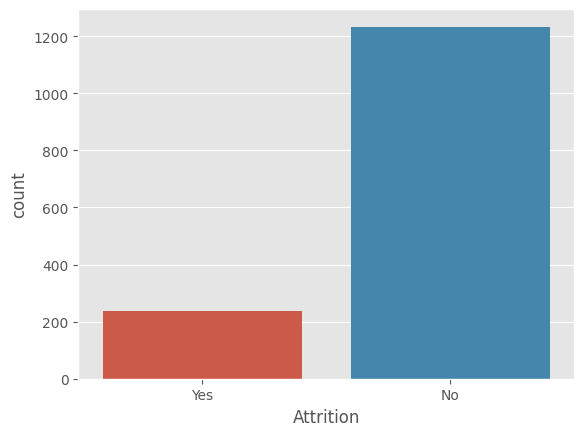

In [143]:
sns.countplot(x='Attrition', data=hr_df)

In [144]:
N, Y = hr_df['Attrition'].value_counts()
print('Number of attrited', Y)
print('Number of rested', N)

Number of attrited 237
Number of rested 1233


In [145]:
print(hr_df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [146]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
categories = []
for column in hr_df.columns:
    print(hr_df[column].dtype)
    if hr_df[column].dtype == object:
        categories.append(column)

for column in categories:
    hr_df[column] = label.fit_transform(hr_df[column])

int64
object
object
int64
object
int64
int64
object
int64
int64
int64
object
int64
int64
int64
object
int64
object
int64
int64
int64
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [147]:
print(hr_df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

['EmployeeCount', 'Over18', 'StandardHours']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'BusinessTravel'),
  Text(2, 0, 'DailyRate'),
  Text(3, 0, 'Department'),
  Text(4, 0, 'DistanceFromHome'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'EducationField'),
  Text(7, 0, 'EmployeeNumber'),
  Text(8, 0, 'EnvironmentSatisfaction'),
  Text(9, 0, 'Gender'),
  Text(10, 0, 'HourlyRate'),
  Text(11, 0, 'JobInvolvement'),
  Text(12, 0, 'JobLevel'),
  Text(13, 0, 'JobRole'),
  Text(14, 0, 'JobSatisfaction'),
  Text(15, 0, 'MaritalStatus'),
  Text(16, 0, 'MonthlyIncome'),
  Text(17, 0, 'MonthlyRate'),
  Text(18, 0, 'NumCompaniesWorked'),
  Text(19, 0, 'OverTime'),
  Text(20, 0, 'PercentSalaryHike'),
  Text(21, 0, 'PerformanceRating'),
  Text(22, 0, 'RelationshipSatisfaction'),
  Text(23, 0, 'StockOptionLevel'),
  Text(24, 0, 'TotalWorkingYears'),
  Text(25, 0, 'TrainingTimesLastYear'),
  Text(26, 0, 'WorkLifeBala

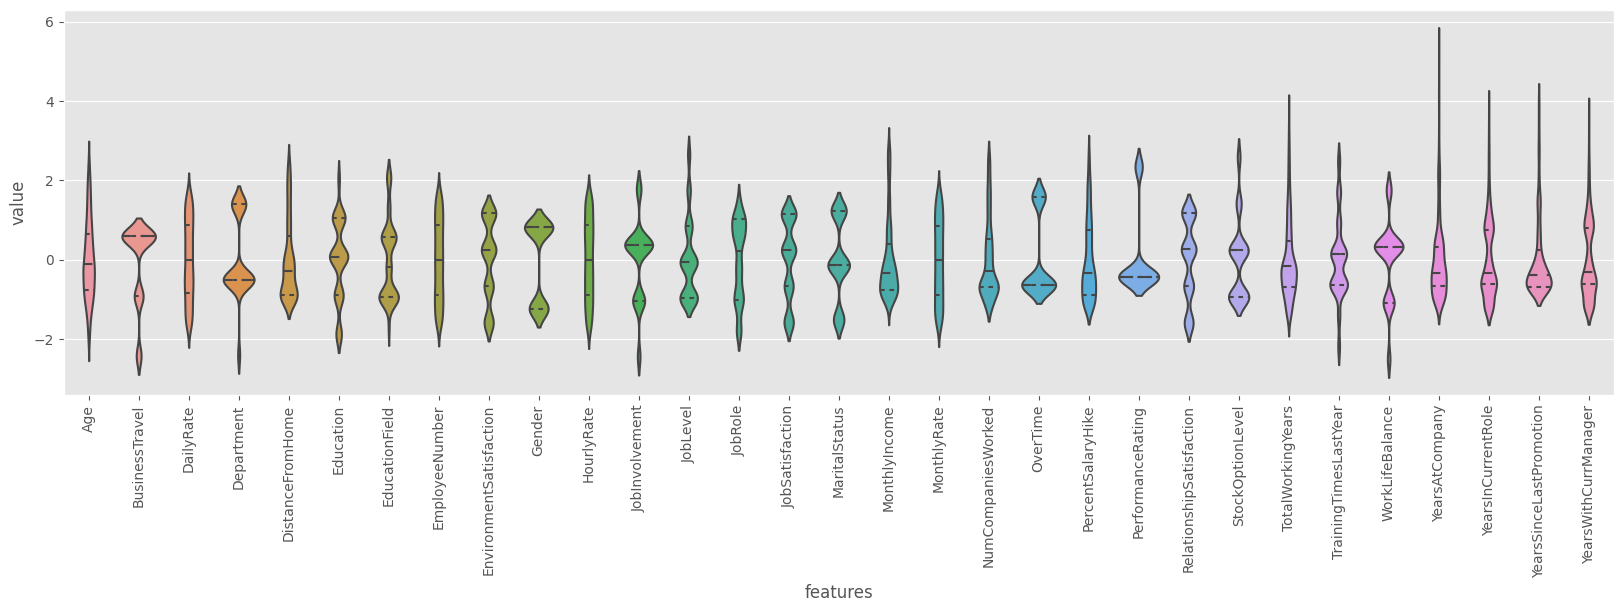

In [148]:
hr_df_std = (hr_df - hr_df.mean()) / (hr_df.std())
hr_df_std['Attrition'] = hr_df['Attrition']

dropped_columns = []

for column in hr_df_std:
    if hr_df_std[column].isna().sum() != 0:
        hr_df_std = hr_df_std.drop(column, axis=1)
        dropped_columns.append(column)

print(dropped_columns)

hr_df_std_melt = pd.melt(hr_df_std, 
id_vars='Attrition', 
var_name='features', 
value_name='value')

plt.figure(figsize=(20, 5))
sns.violinplot(x='features', 
y='value',
data=hr_df_std_melt, 
split=True, 
inner='quart')
plt.xticks(rotation=90)
    


Text(0.5, 1.0, 'Heatmap of Attrition data features')

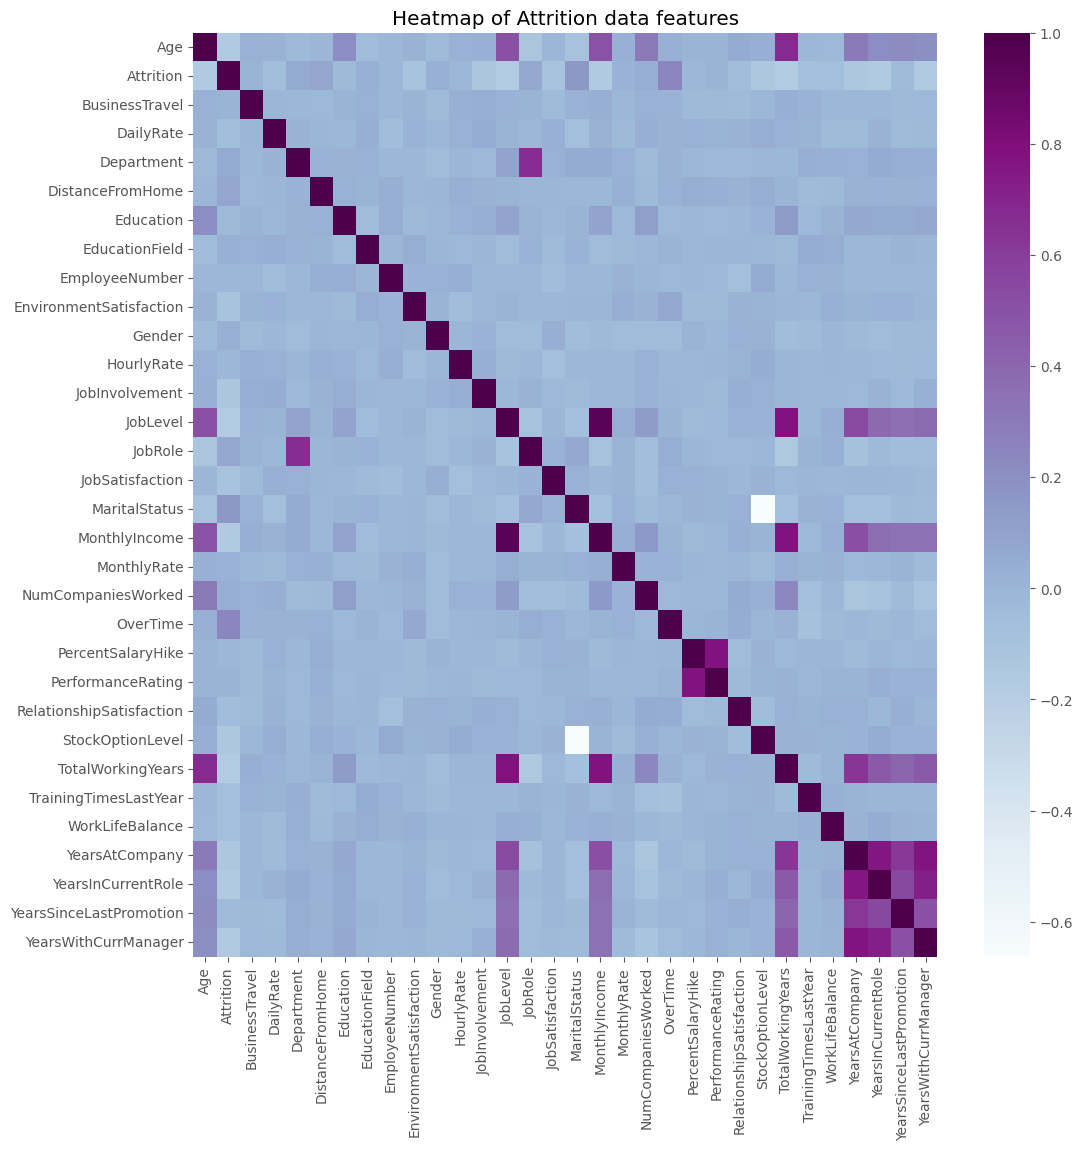

In [149]:
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(hr_df_std.corr(), cmap='BuPu')
r.set_title('Heatmap of Attrition data features')

In [150]:
x = hr_df_std.drop(columns=['Attrition'])
y = hr_df_std['Attrition']

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

Accuracy is:  0.8616780045351474


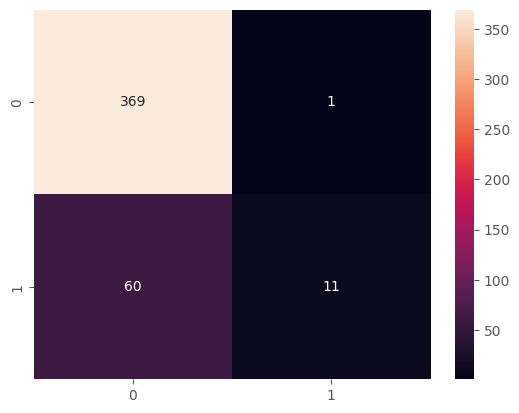

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

clf_rf = RandomForestClassifier(random_state=14)
clf_rf = clf_rf.fit(x_train, y_train)
ac = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(x_test))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [153]:
from sklearn.feature_selection import RFE

In [154]:
clf_rf_3 = RandomForestClassifier()

Chosen best 5 features by rfe: Index(['Age', 'DailyRate', 'EmployeeNumber', 'MonthlyIncome', 'MonthlyRate'], dtype='object')
Accuracy is:  0.8344671201814059


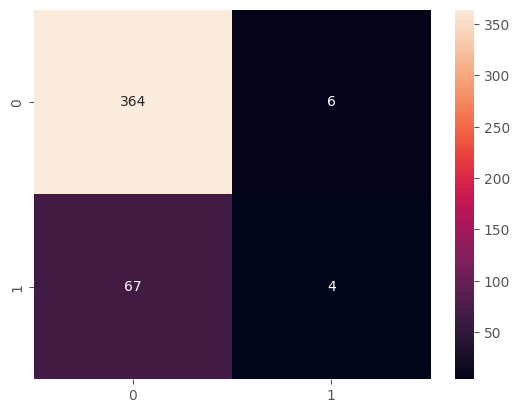

In [157]:
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 features by rfe:', x_train.columns[rfe.support_])

x_train_5features = x_train[x_train.columns[rfe.support_]]
x_test_5features = x_test[x_test.columns[rfe.support_]]

clf_rf = RandomForestClassifier(random_state=14)
clf_rf = clf_rf.fit(x_train_5features, y_train)
ac = accuracy_score(y_test, clf_rf.predict(x_test_5features))

print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(x_test_5features))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

